In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_diabetes
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
import math

# Check Normalization

In [ ]:
diabetes = load_diabetes()

bmi = diabetes.data[:, 2]
target = diabetes.target
print(bmi[:10])

[ 0.06169621 -0.05147406  0.04445121 -0.01159501 -0.03638469 -0.04069594
 -0.04716281 -0.00189471  0.06169621  0.03906215]


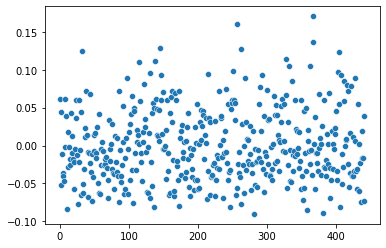

In [ ]:
sns.scatterplot(x = np.arange(442), y = bmi)

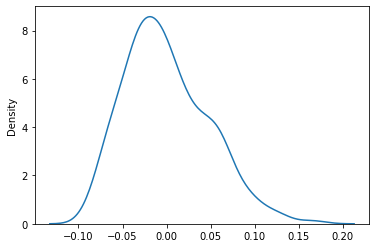

In [ ]:
sns.kdeplot(data = bmi)

# Normal Curve

In [ ]:
def normal(x, mu = 0, sigma = 1):
  return math.exp(-(x-mu)**2/(2*(sigma**2))/math.sqrt(2*math.pi)*sigma)

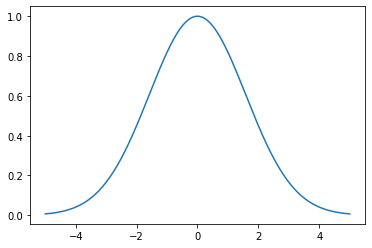

In [ ]:
xs = np.linspace(-5, 5, 442)
ys = np.array([normal(x) for x in xs])

_, axe = plt.subplots()
axe.plot(xs, ys)

# Normalization check using Q-Q plot
- **특정 dataset이 normal distribution(or other distributions)을 만족하는지 확인하기 위한 plot**
- Linear line에 가까울수록 normalization을 잘 따름
- statsmodels.api의 qqplot은 기본적으로 normal curve와 비교 (다른 curve와도 비교 가능)
- Normalization이 되어있지 않은 data도 분포도를 알아서 그려준다.
- https://www.statsmodels.org/dev/generated/statsmodels.graphics.gofplots.qqplot.html

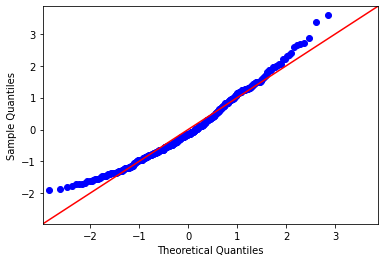

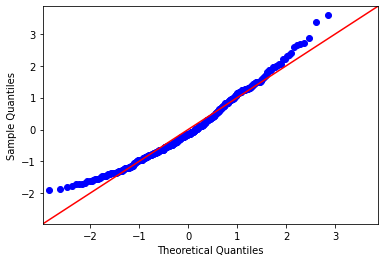

In [ ]:
import statsmodels.api as sm
sm.qqplot(bmi, fit = True, line = '45')

# Functions
- Linear line
- Back propagation
- Scatter plotting
- Sum of Squared Error (SSE)
- Mean of Squared Error (MSE)
- r2_score

In [ ]:
def myline(x, a = 1.0, b = 1.0):
  return a*x + b

def back_prop(x, y, a = 1.0, b = 1.0):
  y_hat = a*x + b
  err = y - y_hat
  a += x*err
  b += err
  return a, b

def scat_plot(x, y, a, b):
  xs = np.linspace(-0.1, 0.17, 10)

  _, axe = plt.subplots()
  sns.scatterplot(x, y, ax = axe)
  axe.plot(xs, myline(xs, a, b))

def SSE(tgt, model):
  return ((tgt - model)**2).sum()   # (y - y_hat)**2, chain rule, differentiation = (y - y_hat)*x

def MSE(tgt, model):
  return ((tgt - model)**2).mean()

def r2(tgt, model):
  return 1 - SSE(tgt, model)/SSE(tgt, tgt.mean())

"""
SSE(tgt, tgt.mean()) -> target의 평균값을 가진 수평선을 model로 하여 SSE계산
~ 1의 값을 가지며 1에 가까울수록 적합하다.
만약, 음수의 값이 나온다면, target의 평균값을 가진 수평선보다 model이 부정확하다는 의미로 매우 부정확함을 의미한다.
"""

'\nSSE(tgt, tgt.mean()) -> target의 평균값을 가진 수평선을 model로 하여 SSE계산\n~ 1의 값을 가지며 1에 가까울수록 적합하다.\n만약, 음수의 값이 나온다면, target의 평균값을 가진 수평선보다 model이 부정확하다는 의미로 매우 부정확함을 의미한다.\n'

# Comparison of Models
1. Epoch = 1
2. Epoch = 100
3. Sklearn의 LinearRegression

587.8654539985689 99.40935564531424


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


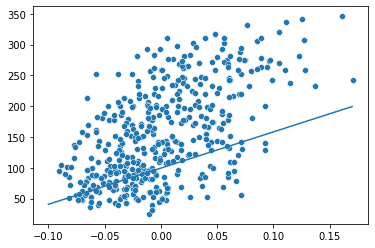

In [ ]:
# 1. Epoch = 1
a = 1.0
b = 1.0

list_a = []
for bmi_i, target_i in zip(bmi, target):
  a, b = back_prop(bmi_i, target_i, a, b)
  list_a.append(a)
a1, b1 = a, b
print(a1, b1)

scat_plot(bmi, target, a1, b1)

- Gradient의 조정이 어떻게 이루어지는지 그래프로 확인
- 적절한 gradient를 찾아가는 과정

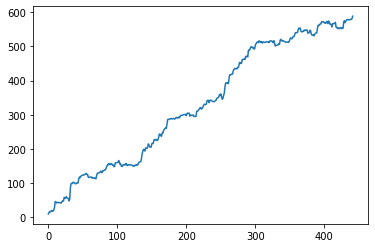

In [ ]:
_, axe = plt.subplots()
axe.plot(list_a)

913.5973364345905 123.39414383177204


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


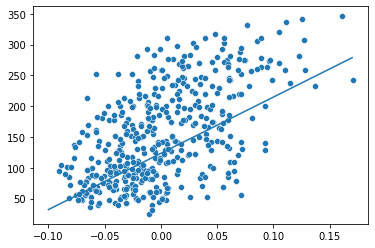

In [ ]:
# 2. Epoch = 100
a = 1.0
b = 1.0

list_a = []
for i in range(100):
  for bmi_i, target_i in zip(bmi, target):
    a, b = back_prop(bmi_i, target_i, a, b)
  list_a.append(a)
a2, b2 = a, b
print(a2, b2)

scat_plot(bmi, target, a2, b2)

- Epoch을 1번 돌때마다 gradient의 변화가 어떻게 이루어지는지 확인
- Epoch의 초반에 거의 최적의 gradient 값을 찾는다.

# 특정 Loss of Function(LoF)을 이용하여 최적의 hyper-parameter(epochs)를 찾는다.
- Loss of Function은 **SSE, MSE** 등을 사용한다.
- 해당 그래프의 기울기가 0 or 0에 근접한 epoch에서 조정을 멈춘다.  
  (아래에서는 굳이 100 epochs를 할 필요가 없음, 대략 10에서 거의 이미 완료!)



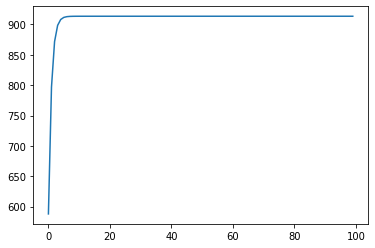

In [ ]:
_, axe = plt.subplots()
axe.plot(list_a)

949.4352603839491 152.1334841628967


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


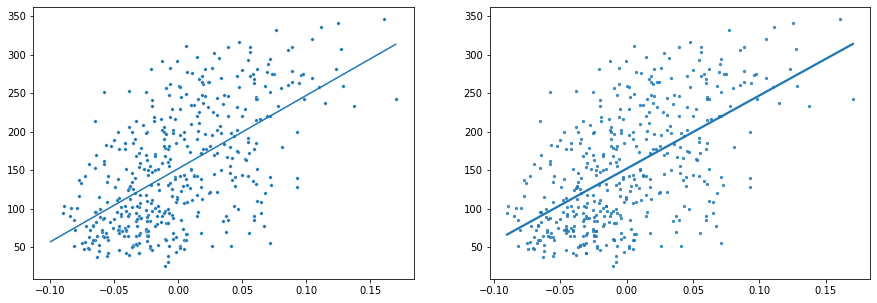

In [ ]:
# 3. Sklearn의 LinearRegression
reg = LinearRegression().fit(bmi[:, np.newaxis], target)
a3, b3 = reg.coef_[0], reg.intercept_
print(a3, b3)

fig, axes = plt.subplots(1, 2, figsize = (15, 5))
xs = np.linspace(-0.1, 0.17, 10)

sns.scatterplot(bmi, target, ax = axes[0], s = 12)
axes[0].plot(xs, myline(xs, a3, b3))

sns.regplot(x = bmi, y = target, ci = None, ax = axes[1], scatter_kws={'s':5})

# Test three models
- 각 점과 직선사이의 거리를 계산하여 error값이 최소인 model이 최적의 linear line이 된다.
- **Sum of Squared Error(SSE)**로 비교

In [ ]:
err1 = SSE(target, myline(bmi, a1, b1))
err2 = SSE(target, myline(bmi, a2, b2))
err3 = SSE(target, myline(bmi, a3, b3))
print('Sum of Squared Error value of method 1: {:.3f}'.format(err1))
print('Sum of Squared Error value of method 2: {:.3f}'.format(err2))
print('Sum of Squared Error value of method 3: {:.3f}'.format(err3))

Sum of Squared Error value of method 1: 3079001.043
Sum of Squared Error value of method 2: 2085935.927
Sum of Squared Error value of method 3: 1719581.811


SSE의 값은 3번 < 2번 < 1번 순이므로,   
3번이 가장 적합하다.

- **Mean of Square Error(MSE)**로 비교

In [ ]:
err1 = MSE(target, myline(bmi, a1, b1))
err2 = MSE(target, myline(bmi, a2, b2))
err3 = MSE(target, myline(bmi, a3, b3))
print('Mean of Squared Error value of method 1: {:.3f}'.format(err1))
print('Mean of Squared Error value of method 2: {:.3f}'.format(err2))
print('Mean of Squared Error value of method 3: {:.3f}'.format(err3))
print('Mean of Squared Error value of method 3: {:.3f}'.format(mean_squared_error(target, myline(bmi, a3, b3))))

Mean of Squared Error value of method 1: 6966.066
Mean of Squared Error value of method 2: 4719.312
Mean of Squared Error value of method 3: 3890.457
Mean of Squared Error value of method 3: 3890.457


MSE의 값은 3번 < 2번 < 1번 순이므로,   
3번이 가장 적합하다.

# r2_score
- 1에 가까운 값을 가질수록 데이터를 표현하기에 적합
- model의 적합성을 판단하는 값

In [ ]:
print('r2_score of method 1: {:.3f}'.format(r2_score(target, myline(bmi, a1, b1))))
print('r2_score of method 2: {:.3f}'.format(r2_score(target, myline(bmi, a2, b2))))
print('r2_score of method 3: {:.3f}'.format(r2_score(target, myline(bmi, a3, b3))))
print('r2_score of method 3: {:.3f}'.format(r2(target, myline(bmi, a3, b3))))

r2_score of method 1: -0.175
r2_score of method 2: 0.204
r2_score of method 3: 0.344
r2_score of method 3: 0.344


# 결과적으로 SSE값이 최소값인 model or hyper-parameters를 선택해야 함
- SSE의 변화값 (미분값)을 통해 0에 근접할 때의 값을 찾는다.

# Error Curve
- Normal distribution을 따라야 함
- 어느정도 normal distribution을 따름

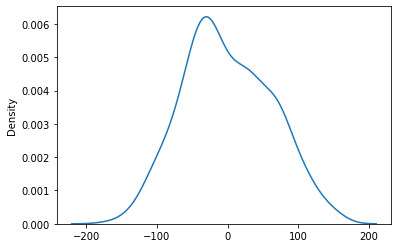

In [ ]:
err_array = target - myline(bmi, a3, b3)
sns.kdeplot(err_array)

# Training, Testing Data
- Machine Learning은 training data외에 실제 data의 추측에 있어서 높은 정확도를 가져야 한다.
- 따라서, 한정된 dataset내에서 일부를 testing data로 나눈 뒤, training이 끝난 후. 확인할 때 사용한다.

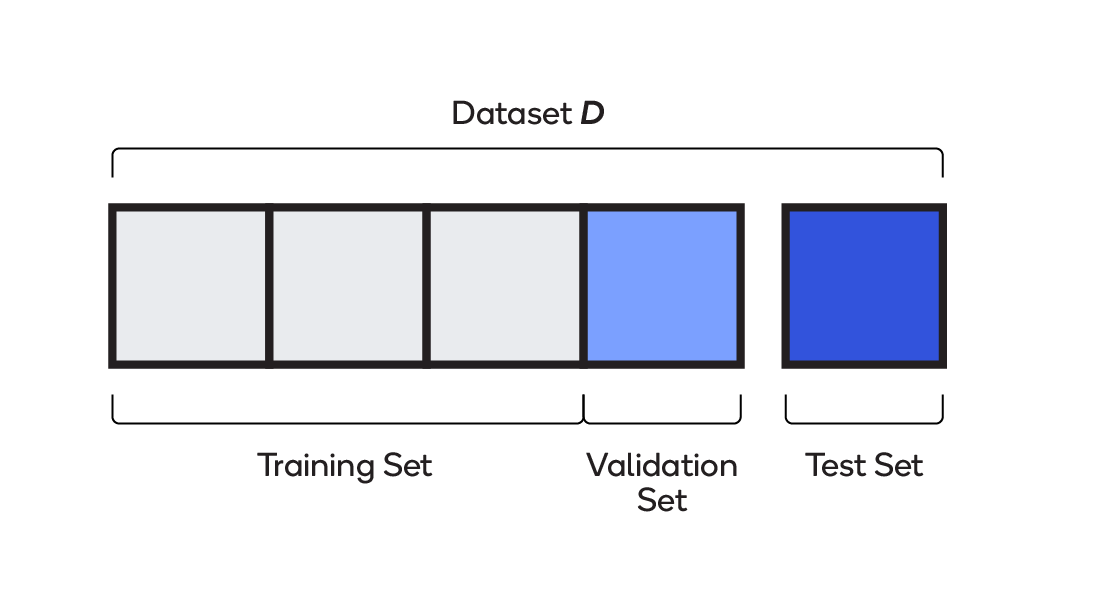

Reference:
https://developer.qualcomm.com/software/qualcomm-neural-processing-sdk/learning-resources/training-testing-machine-learning-models/training-testing-evaluating-machine-learning-models

In [ ]:
print(bmi.shape)

(442,)


# Train_test_split
- Data를 train용, test용으로 분리
- 비율, shuffle 여부 등 결정 가능
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [ ]:
bmi_train, bmi_test, target_train, target_test = train_test_split(bmi[:, np.newaxis], target)
print(bmi_train.shape)
print(bmi_test.shape)

(331, 1)
(111, 1)


In [ ]:
reg = LinearRegression().fit(bmi_train, target_train)

target_predict = reg.predict(bmi_test)
print(target_predict[:10])
print(target_test[:10])

[143.06353881 125.36599853 232.59227196 219.05885881 134.73528456
 167.00726976 207.60750922 146.18663415 159.7200473  154.51488839]
[155. 118. 261. 220. 104. 139. 268.  88. 235. 107.]


# K-fold Cross Validation
- Constant number(k)의 set을 test용으로 사용
- 위의 과정을 반복 진행

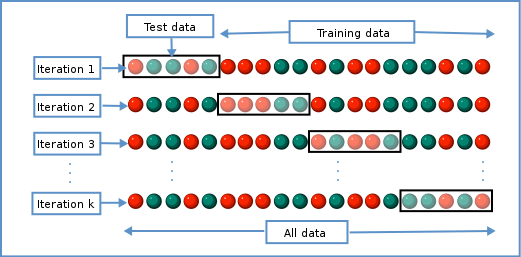

Reference: https://ko.m.wikipedia.org/wiki/%ED%8C%8C%EC%9D%BC:K-fold_cross_validation_EN.svg

# Application
- 체력검증 결과를 통해 Chins(턱걸이 횟수)를 input data, Weight(무게)를 target으로 하여 linear regression을 시행해본다.

In [ ]:
linnerud = datasets.load_linnerud()
print(linnerud.DESCR)

.. _linnerrud_dataset:

Linnerrud dataset
-----------------

**Data Set Characteristics:**

    :Number of Instances: 20
    :Number of Attributes: 3
    :Missing Attribute Values: None

The Linnerud dataset is a multi-output regression dataset. It consists of three
exercise (data) and three physiological (target) variables collected from
twenty middle-aged men in a fitness club:

- *physiological* - CSV containing 20 observations on 3 physiological variables:
   Weight, Waist and Pulse.
- *exercise* - CSV containing 20 observations on 3 exercise variables:
   Chins, Situps and Jumps.

.. topic:: References

  * Tenenhaus, M. (1998). La regression PLS: theorie et pratique. Paris:
    Editions Technic.

(20, 3)


In [ ]:
linn = pd.DataFrame(np.hstack((linnerud.data, linnerud.target)), columns = ['Chins', 'Situps', 'Jumps', 'Weight', 'Waist', 'Pulse'])
print(linn)
chins = linn['Chins']
weight = linn['Weight']

    Chins  Situps  Jumps  Weight  Waist  Pulse
0     5.0   162.0   60.0   191.0   36.0   50.0
1     2.0   110.0   60.0   189.0   37.0   52.0
2    12.0   101.0  101.0   193.0   38.0   58.0
3    12.0   105.0   37.0   162.0   35.0   62.0
4    13.0   155.0   58.0   189.0   35.0   46.0
5     4.0   101.0   42.0   182.0   36.0   56.0
6     8.0   101.0   38.0   211.0   38.0   56.0
7     6.0   125.0   40.0   167.0   34.0   60.0
8    15.0   200.0   40.0   176.0   31.0   74.0
9    17.0   251.0  250.0   154.0   33.0   56.0
10   17.0   120.0   38.0   169.0   34.0   50.0
11   13.0   210.0  115.0   166.0   33.0   52.0
12   14.0   215.0  105.0   154.0   34.0   64.0
13    1.0    50.0   50.0   247.0   46.0   50.0
14    6.0    70.0   31.0   193.0   36.0   46.0
15   12.0   210.0  120.0   202.0   37.0   62.0
16    4.0    60.0   25.0   176.0   37.0   54.0
17   11.0   230.0   80.0   157.0   32.0   52.0
18   15.0   225.0   73.0   156.0   33.0   54.0
19    2.0   110.0   43.0   138.0   33.0   68.0


# 각 variables가 independent인지 확인

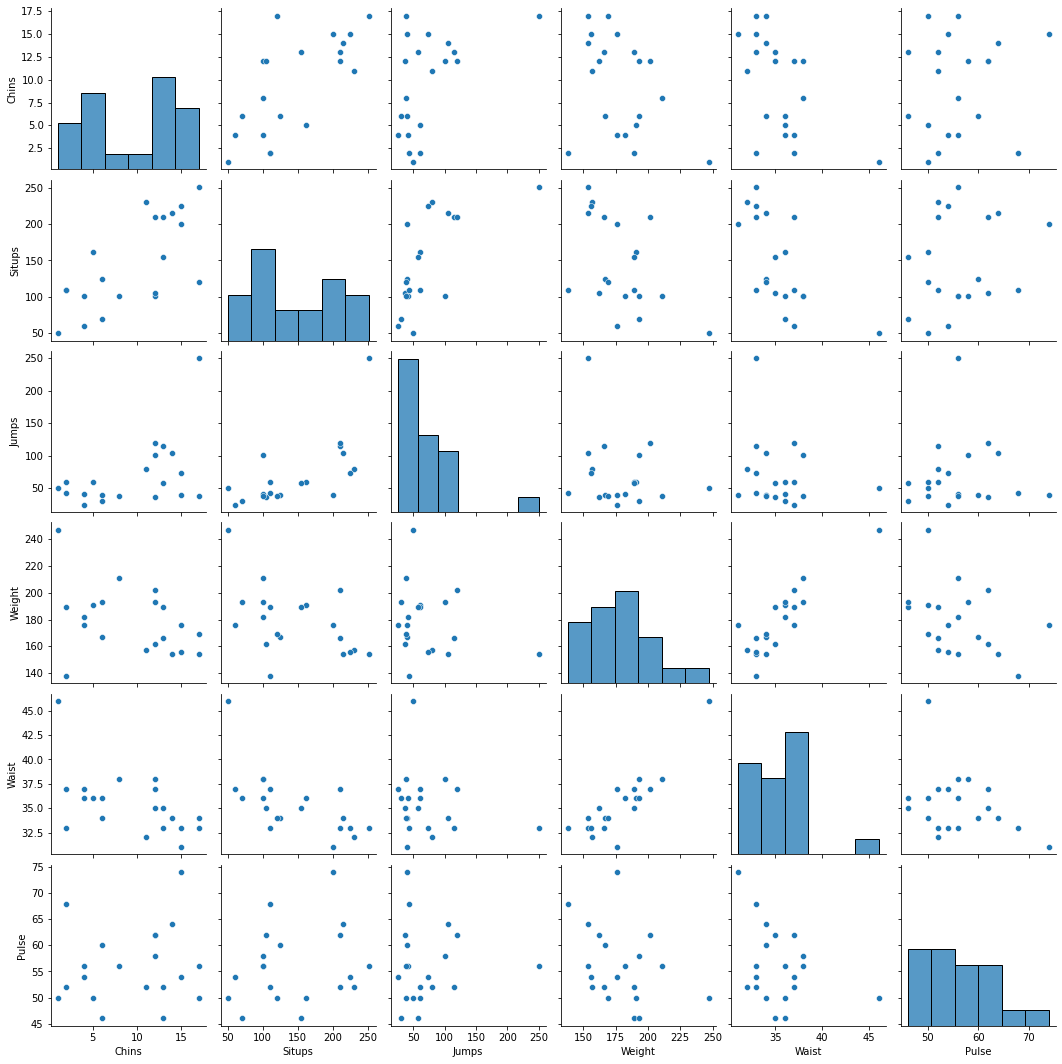

In [ ]:
sns.pairplot(linn)

# Chins, Weight가 normal distribution을 따르는지 확인
- Q-Q plot 사용
- 수가 작아서 확실히 normal distribution을 따른다고 하기 힘듬  
  (하지만, 일단 계속 진행하고자 한다.)

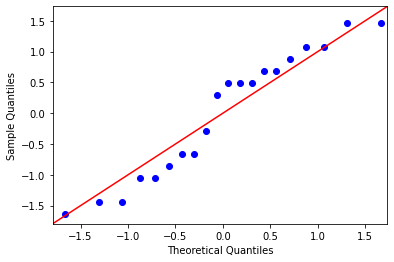

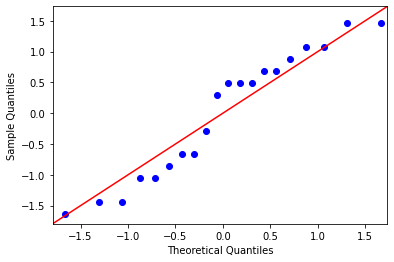

In [ ]:
sm.qqplot(chins, fit = True, line = '45')

# Training data, Testing data 분리
- 3:1로 분리

In [ ]:
chins_train, chins_test, weight_train, weight_test = train_test_split(chins[:, np.newaxis], weight)
print(chins_train.shape)
print(chins_test.shape)

(15, 1)
(5, 1)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  """Entry point for launching an IPython kernel.


# Linear Regression 만들기, Training data graph

-2.1114265436479775 201.90702625975868


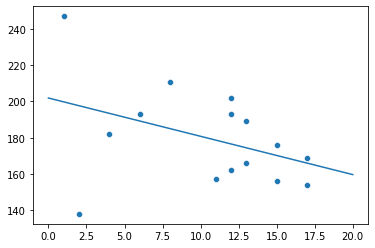

In [ ]:
reg = LinearRegression().fit(chins_train, weight_train)

#print(type(chins_train), type(weight_train))

xs = np.linspace(0, 20, 20)

_, axe = plt.subplots()
sns.scatterplot(x = chins_train.flatten(), y = weight_train.values, ax = axe)
a, b = reg.coef_[0], reg.intercept_
print(a, b)
axe.plot(xs, myline(xs, a, b))

# Test data graph

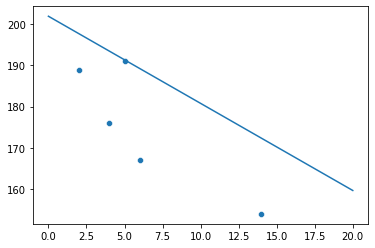

In [ ]:
_, axe = plt.subplots()
sns.scatterplot(x = chins_test.flatten(), y = weight_test.values, ax = axe)
axe.plot(xs, myline(xs, a, b))

# Prediction & r2_score를 통해서 model의 evaluation

In [ ]:
weight_predict = reg.predict(chins_test)

print('r2_score(Training): ', r2_score(weight_train, myline(chins_train, a, b)))
print('r2_score(Testing): ', r2_score(weight_test, weight_predict))

r2_score(Training):  0.15866365161285012
r2_score(Testing):  -0.26577394169835267


# Result
- 15개의 training data를 통해 Chins에 따른 Weight의 상관관계를 학습하고, 5개의 testing data에서 r2_score로 적합성을 판단한 결과, 음수의 값이 나왔다.
- 음수의 값은 해당 model이 mean을 이용한 수평선보다 적합도가 낮음을 의미한다.

# Discussion
- 해당 Test에서는 training을 한번만 진행하였기 때문에 정확도가 낮다.
- 이는 **k-fold cross validation**을 통해서 개선이 가능하다.

$~$

- 또한, 해당 data는 20개의 **작은 dataset으로 인해 학습 및 예측이 매우 어렵다.**
- **Normal distribution을 완벽하게 따르지 않은 것** 또한 이러한 낮은 부적합성의 이유가 될 수 있다.
